In [30]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use("fivethirtyeight")
from collections import Counter

from rmqa_plots import *

# Probability and distributions

(Note: I assume that prior courses have covered the basic concepts of (i) probability, (ii) random variables and (iii) probabilility distributions. So this chapters serves the purpose of refreshing this knowledge and learning how to implement these concepts in Python.

## Random variables

A **random variable** is a variable whose values are not deterministic and depend on outcomes of a random phenomenon. 

We can distinguish between:

1. **discrete** random variables: takes a finite or countably infinite number of distinct values

2. **continous** random variables: assumes an uncountably infinite number of values

Examples of **discrete** random variables:

| Experiment                       | Random variable ($x$)           | Possible values for random variable |
|----------------------------------|---------------------------------|-------------------------------------|
| Contact five customers           | # of customers placing an order | $0, 1, 2, 3, 4, 5$                    |
| Inspect a shipment of 10 iPhones | # of defective devices     | $0, 1, 2, \cdots, 9, 10$                   |
| Operate a theme park for one day | # of customers             | $0, 1, 2,\ldots$                        |
| Sell a laptop                    | Gender of customers             | $0$ if female, $1$ if male              |

Examples of **continous** random variables:

| Experiment                  | Random variable ($x$)                             | Possible values for random variable |
|-----------------------------|---------------------------------------------------|-------------------------------------|
| Operate a McDonald's        | Time between customer arrivals in minutes         | $x \geq 0$                          |
| Fill a coffee mug           | Number of ml                                      | $0 \leq x \leq 500ml$               |
| Construct a new library     | Percentage of project complete after six months   | $0 \leq x \leq 100$                 |
| Test a new chemical process | Temperature when the desired reaction takes place | $-3 C^{\circ} \leq 120 C^{\circ}$   |

## Probability distributions

A **probability distribution** for a random (discrete or continous) variable describes how probabilities are distributed over the values of the random variables.

### Discrete probability distributions

For a discrete random variable $x$, the probability distrinbution is defined by a **probability function**, denoted by $f(x)$. The probability function provides the probability for each value of the random variable. 

#### Binominal distribution

Recall that a **binominal experiment** exhibits the following properties:

1. The experiment consists of a sequence of $n$ identical trials
2. Two outcomes are possible on each trial (success, failure)
3. The probablity of a success, denoted by $p$, does not change from trial to trial (also the probability of failure - $1-p$ - does not change)
4. The trials are independent

**Example**: let's assume we flip a coin 5 times and are interested in the number of heads appearing in 5 trials. Let's call this variable of interst $k$.

> What is the probablity of getting $0, \ldots, 5$ heads?

While for the edge cases ($0$ and $5$) it is easy to calculate the probabilities:

In [31]:
p = 0.5**5
p

0.03125

It is more tedious to do the calculation for the cases of $2, \ldots, 4$ given the order does not matter and there are several combinations how one could e.g. end up getting $2$ heads

- H H T T T
- H T H T T
- T H T T H
- ...

Recall that the **binomial probability function** is defined as

$$f(k) = \binom{n}{k}\theta^k(1-\theta)^{(n-k)}$$

where

  \begin{equation}
  \begin{aligned}
    f(x) & = \text{the probability of $x$ successes in $n$ trials} \\[10pt]
     n  &= \text{the number of trials} \\[10pt]
     \binom{n}{k} &= \frac{n!}{k!(n-k)!} \\[10pt]
     \theta &= \text{the probability of a success on any one trial} \\[10pt]
      \end{aligned}
  \end{equation}

Let's calculate the probability of 3 heads (out of 5 trials). 

Show 

- scipy: analytical

- numpy/scipy: via simulation

In [3]:
import math

In [4]:
n = 5
k = 3
p = 0.5
math.comb(n,k) * p**k * (1-p)**(n-k)

0.3125

In `Python` we can use the `scipy module` to easily conduct statistical analysis. 

In [5]:
import scipy.stats as stats # import the stats module from scipy

In [36]:
n = 5
k = 3
p = 0.5
coin_flip = stats.binom(n,p) # 5 trials with prob 0.5

In [37]:
coin_flip.pmf(k)

0.3125

Let's calculate the probabilities for all possible cases (i.e. $0, 1, \ldots, 5$ heads) and plot the probabilities.

In [44]:
probs = [coin_flip.pmf(k) for k in [0,1,2,3,4,5]] # somewhat verbose
probs

[0.03125, 0.15624999999999994, 0.3125, 0.3125, 0.15624999999999994, 0.03125]

In [45]:
ks = np.arange(0,6) # define all cases 
probs = coin_flip.pmf(ks) # calculate probabilites for all cases
probs

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

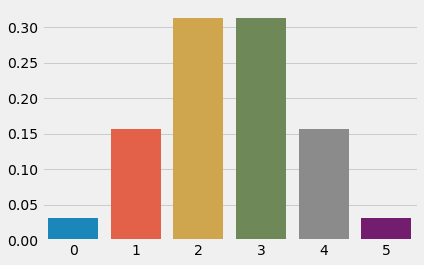

In [46]:

#plot_pmf(ks,probs) # Rename to plot_pmf
sns.barplot(ks,probs)

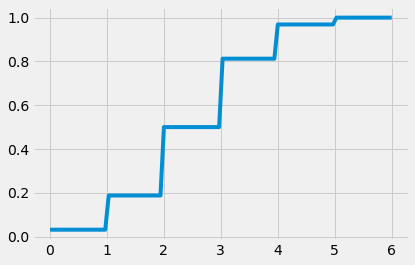

In [10]:
ks = np.linspace(0,6,100)
probs = coin_flip.cdf(ks)
sns.lineplot(ks,probs);

In [11]:
dice = stats.randint(1,7)
eye1 = dice.rvs(1000)
eye2 = dice.rvs(1000)
eyes = eye1 + eye2
probs = np.bincount(eyes)
probs

array([  0,   0,  28,  56,  86, 117, 144, 168, 130, 104,  80,  56,  31])

In [12]:
dice = stats.binom(6,1/6)
ks = np.arange(1,7)
dice.cdf(ks)

array([0.73677555, 0.93771433, 0.99129801, 0.99933556, 0.99997857,
       1.        ])

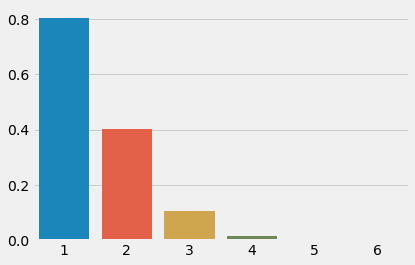

In [13]:
ks = np.arange(1,7)
probs = dice.pmf(ks) + dice.pmf(ks)
sns.barplot(ks,probs);

In [14]:
ks = np.arange(0,7)
dice1 = stats.binom(1,1/6)
dice2 = stats.binom(1,1/6)
dice1.pmf(ks)

array([0.83333333, 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

0.3

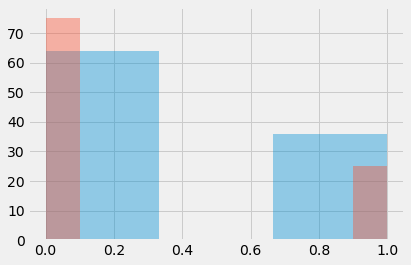

In [28]:
smpl = np.random.choice([0,1],p=[0.7,0.3],size=100)
dgp = stats.binom(1,0.3)
smpl2 = dgp.rvs(100)
sns.distplot(smpl,kde=False)
sns.distplot(smpl2, kde=False)
dgp.pmf(1)

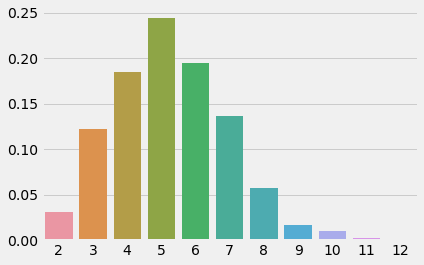

In [526]:
ks = np.arange(2,13)
probs = np.bincount(two_rolls) / len(two_rolls)
sns.barplot(ks,probs)

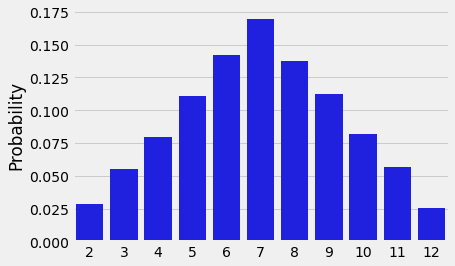

In [31]:
dice = stats.randint(1,7)
eye1 = dice.rvs(10_000)
eye2 = dice.rvs(10_000)
eyes = eye1 + eye2
x = np.unique(eyes)
ns = np.bincount(eyes)
idx = np.nonzero(ns)
ns = ns[idx]
plot_probability(x,ns/len(eyes))

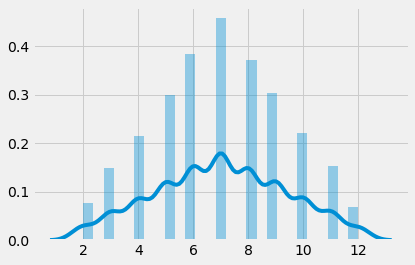

In [33]:
sns.distplot(eyes);

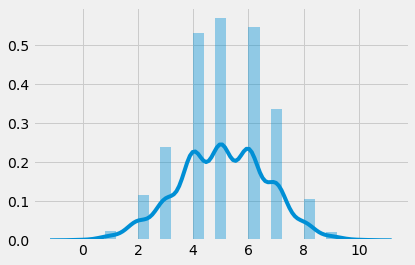

In [34]:
coin = stats.binom(10,0.5)
smpl = coin.rvs(1000)
sns.distplot(smpl)

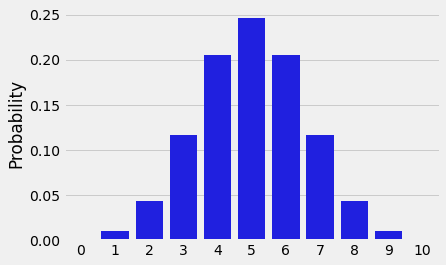

In [35]:
xs = np.arange(0,11)
probs = coin.pmf(xs)
plot_probability(xs, probs)

#### Uniform distribution

One of the most simple 

In [384]:

def histogram(smpl):
    counts = np.bincount(smpl)
    idx = np.nonzero(counts)
    probs = counts[idx] / len(smpl)
    x = np.sort(np.unique(smpl))
    sns.barplot(x,probs,color="blue")
    kde = 
    #plt.bar(x,probs)

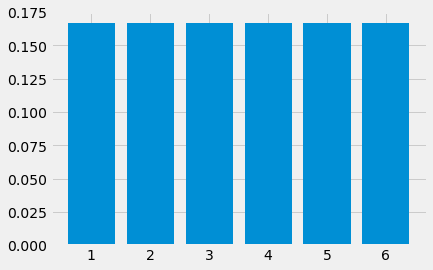

In [434]:
eyes = np.arange(1,7)
dice = stats.randint(1,7)
probs = dice.pmf(eyes)#[dice.pmf(eye) for eye in eyes]
plt.bar(eyes, probs)
sns.distplot(eyes,probs, kde=False);

In [443]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


eyes = np.arange(1,7)
dice = stats.randint(1,7)
#custm = stats.rv_discrete(name='custm', values=(xk, pk))
len(eyes), len(dice.pmf(eyes))

(6, 6)

The cumulative density function (cdf) 

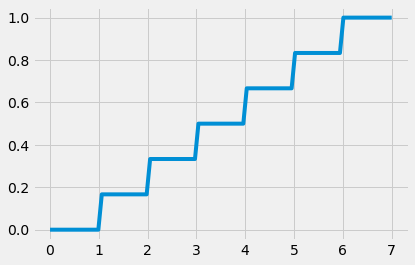

In [463]:
from matplotlib.pyplot import stem
x = np.linspace(0,7,100)
y = dice.cdf(x)
plt.plot(x,y);

Text(0, 0.5, 'Probability')

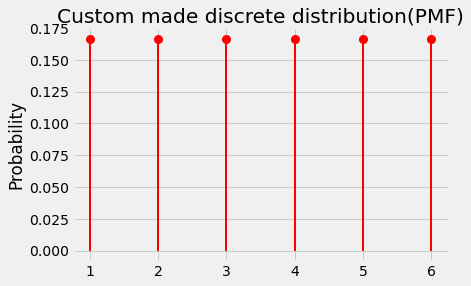

In [448]:
fig, ax = plt.subplots(1, 1)
ax.plot(eyes, dice.pmf(eyes), 'ro', ms=8, mec='r')
ax.vlines(eyes, 0, dice.pmf(eyes), colors='r', linestyles='-', lw=2)
plt.title('Custom made discrete distribution(PMF)')
plt.ylabel('Probability')

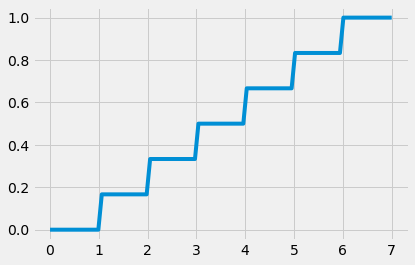

In [427]:
x = np.linspace(0,,100)
y = dice.cdf(x)
plt.plot(x, y)

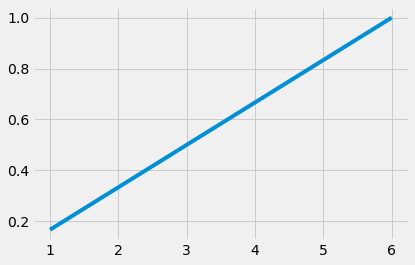

In [421]:
cum_probs = [dice.cdf(eye) for eye in eyes]
plt.plot(eyes, cum_probs)

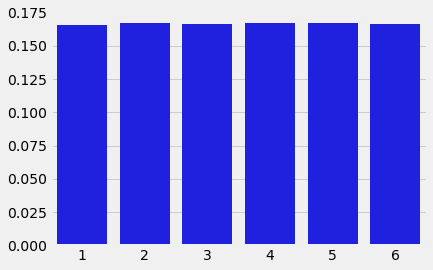

In [408]:
uniform = stats.randint(1,7)
smpl = uniform.rvs(1000_000)


histogram(smpl)

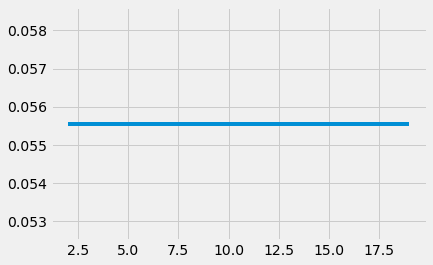

In [395]:
mi = np.min(np.unique(smpl))
ma = np.max(np.unique(smpl))
uniform = stats.randint(mi,ma+1)
y=[uniform.pmf(i) for i in np.arange(mi,ma+1)]
sns.lineplot(x=np.arange(mi,ma+1),y=y)

In [387]:
np.nonzero(np.bincount(smpl))

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]),)

In [353]:
p = 0.20
np.sum(np.arange(1,7)*p)

4.2

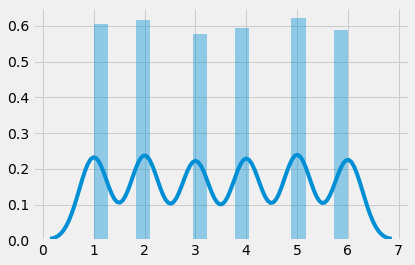

In [262]:
sns.distplot(rolls, kde=True, hist=True);

In [298]:
toss1 = stats.bernoulli.rvs("toss1",p=0.5)
toss1

TypeError: _parse_args_rvs() got multiple values for argument 'p'

In [291]:
b = stats.binom(n=6,p=1/6)
b.pmf(1)

0.40187757201646107

In [260]:
b = stats.binom(6,1/6)
b.pmf(10)

0.0

In [71]:
math.comb(6,3) * (1/6)**3 * (5/6)**3

0.05358367626886146

In [86]:
f = lambda a,b: math.factorial(a) / (math.factorial(a-b)*math.factorial(b))

In [87]:
f(6,3)

20.0

In [88]:
math.comb(6,3)

20

In [122]:
a = stats.binom(6,1/6)
a.cdf(2)
#1 - (a.pmf(2) + a.pmf(1) + a.pmf(0) )

0.9377143347050755

In [114]:
1 - a.cdf(1)

0.26322445130315497

In [196]:
a = stats.norm(loc=0,scale=1)
cutoff = a.ppf(.99)
prob = a.pdf(cutoff)

/Users/felix/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


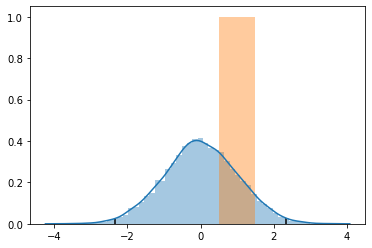

In [199]:

sns.distplot(a.rvs(10_000),norm_hist=True)
sns.(a.cdf(cutoff))
plt.vlines(cutoff,0,prob)
plt.vlines(-cutoff,0,prob)

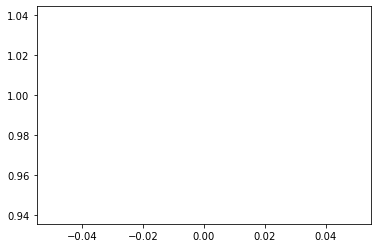

In [200]:
plt.plot(a.cdf(cutoff))

In [201]:
a.cdf(cutoff)

0.99

In [174]:
vs = a.cdf(np.sort(X))
vs[vs == 0.99]

array([], dtype=float64)

In [175]:
a.ppf(3)

nan